In [5]:
# Both Pearson's correlation coefficient (r) and the slope of a regression line are used to estimate heritability, 
# but not the coefficient of determination (R^2) which gives the proportion of phenotypic variance explained
# We will investigate why this is the case

# Exercise 1: Determine the relationship between Pearson's correlation coefficient and 
# the slope of a linear regression line

# set a random seed so everyone gets the same answer
set.seed(8769)

# Generate some random data (parent phenotypes)
series1 = seq(1,100,1)
head(series1)
summary(series1)

[1] 1 2 3 4 5 6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   25.75   50.50   50.50   75.25  100.00 

In [6]:
# Generate some correlated data (offspring phenotypes)
series2 = series1 + rnorm(n=100,m=0,sd=10)
head(series2)
summary(series2)

[1] 11.231266 11.211655  7.096021  8.710032 20.223014 -3.722920

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.723  25.270  51.740  51.150  76.050 112.100 

In [7]:
# linear regression
m = lm(series2~series1)
summary(m)


Call:
lm(formula = series2 ~ series1)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1948  -5.7061  -0.3274   5.9825  20.9576 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07951    1.88150   0.574    0.567    
series1      0.99156    0.03235  30.655   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.337 on 98 degrees of freedom
Multiple R-squared:  0.9056,	Adjusted R-squared:  0.9046 
F-statistic: 939.7 on 1 and 98 DF,  p-value: < 2.2e-16


In [4]:
# extract unadj R^2 from a linear model
unadj.r.sq = summary(m)$r.squared
# Pearson's correlation
correl = cor.test(series1,series2)
# extract r from cor.test result
r = as.numeric(correl$estimate)
# Compare the R to r
sqrt(unadj.r.sq)
r
# We observe that the Pearson’s correlation r is the square root of the unadjusted R^2

[1] 0.9516101

[1] 0.9516101

[1]  1.0231266  0.9211655  0.4096021  0.4710032  1.5223014 -0.9722920

[1] -0.1777823  1.0986093 -1.2805380  1.1026665  1.0747948  0.4364879

[1]  1.4029139  0.9494755 -0.7422093  0.9097024 -2.6798980 -1.0776824

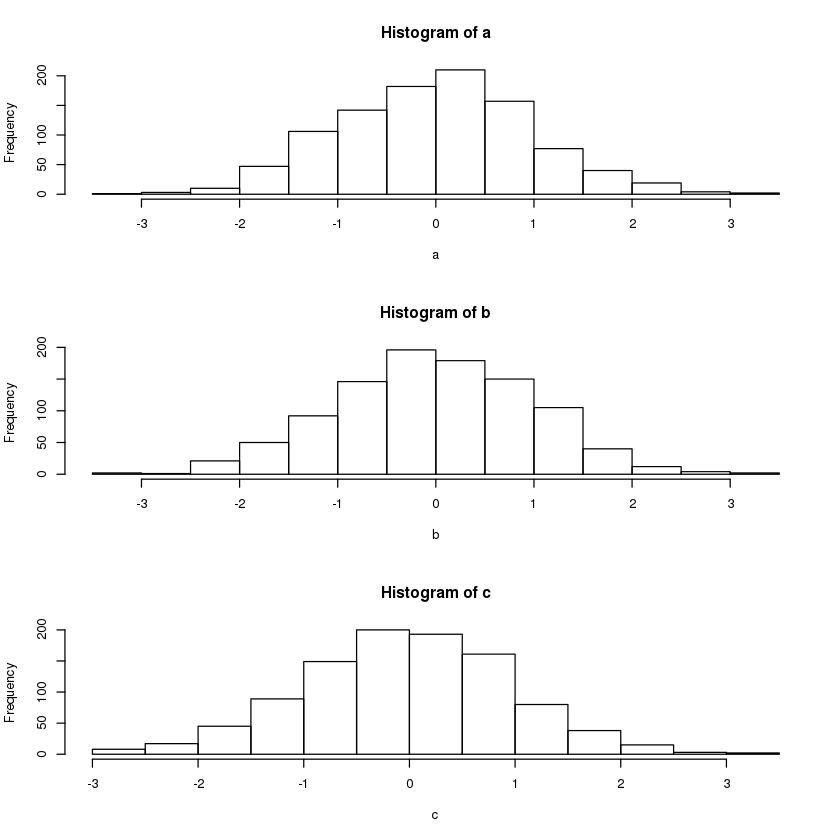

In [8]:
# Exercise 2: Does slope or variance explained describe heritability?

# make up a bunch of random vectors ("phenotypic values")
set.seed(8769)
a = rnorm(n=1000,m=0,sd=1)
b = rnorm(n=1000,m=0,sd=1)
c = rnorm(n=1000,m=0,sd=1)
head(a)
head(b)
head(c)
par(mfrow=c(3,1))
hist(a,breaks=20)
hist(b,breaks=20)
hist(c,breaks=20)

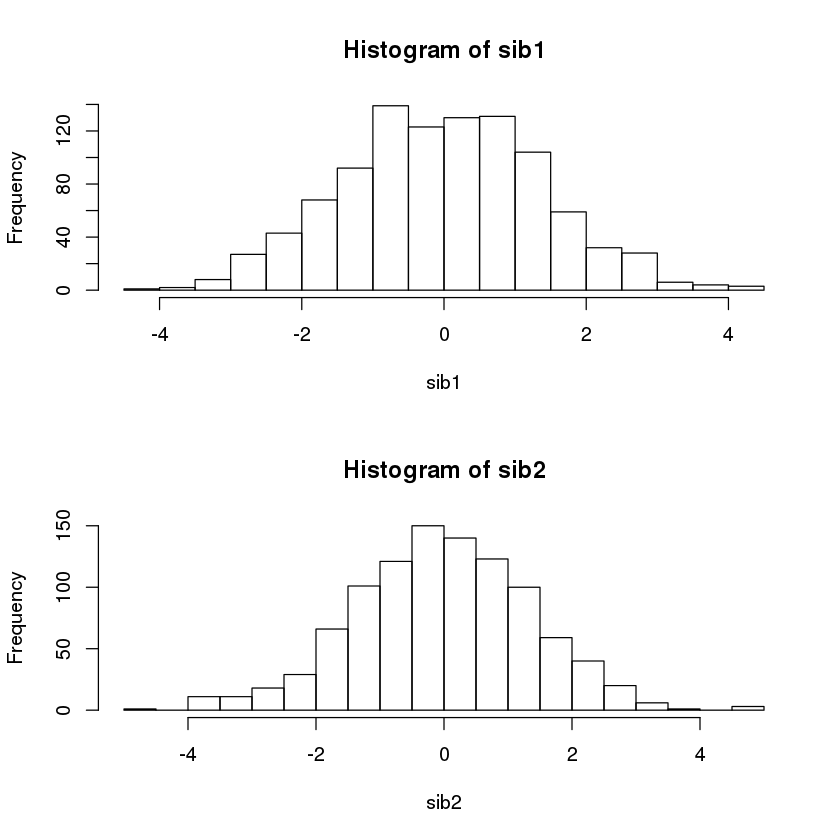

In [9]:
# create a series of sib pairs for which a common factor (a) ought to explain ~50% of variance in "phenotype"
sib1 = a+b
sib2 = a+c
par(mfrow=c(2,1))
hist(sib1,breaks=20)
hist(sib2,breaks=20)

In [10]:
# Get the correlation r between sib pairs
correl = cor.test(sib1,sib2)
r = round(as.numeric(correl$estimate),2)

# Perform a linear regression of sib2 onto sib1
m = lm(sib2~sib1)
summary(m)


Call:
lm(formula = sib2 ~ sib1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1182 -0.8284  0.0463  0.8092  3.6800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02336    0.03849  -0.607    0.544    
sib1         0.46836    0.02773  16.892   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.217 on 998 degrees of freedom
Multiple R-squared:  0.2223,	Adjusted R-squared:  0.2216 
F-statistic: 285.3 on 1 and 998 DF,  p-value: < 2.2e-16


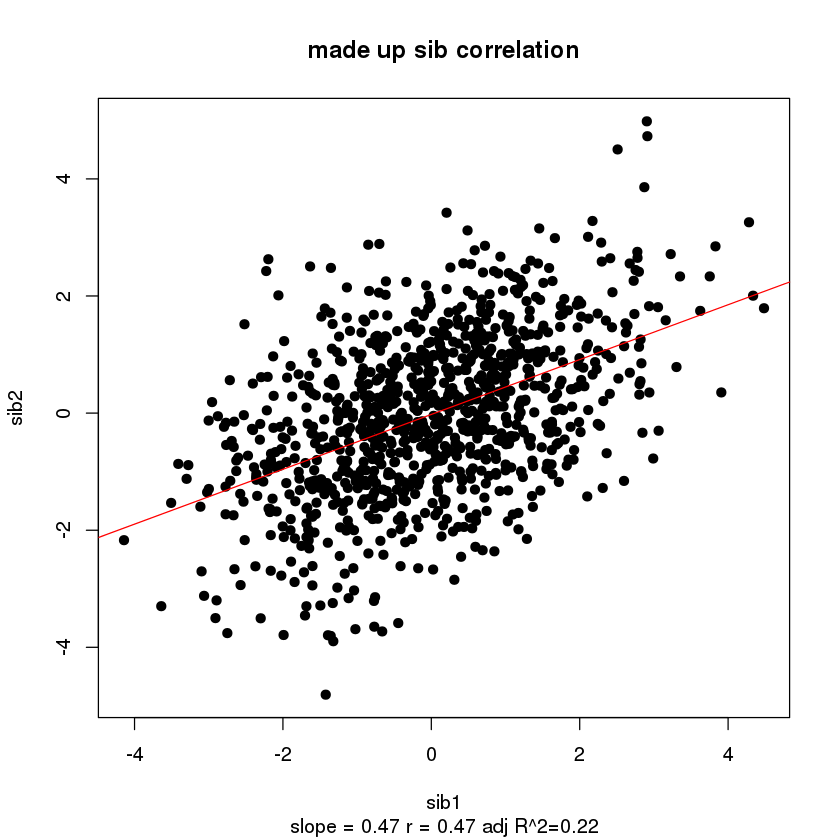

In [11]:
# Get the slope of the regression
slope = round(summary(m)$coefficients[2,1],2)

# Get the coefficient of determination
adj.rsq = round(summary(m)$adj.r.squared,2)

# In this formulation the siblings share half their phenotype (a) and 
# (because we are talking about siblings) about half their genotype
# Thus this experiment corresponds to a trait that could be up to 100% heritable

# Plot the results
plot(sib1,sib2,pch=19,main="made up sib correlation",sub=paste("slope = ",slope," r = ",r," adj R^2=",adj.rsq,sep=""))
abline(m,col="red")

# Which measure looks like the most accurate representation of heritability?

[1] 0.9759751

[1] 2.682887

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.78000 -0.68820 -0.06808 -0.03925  0.59690  2.95100 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-5.350000 -1.119000 -0.099570 -0.003332  1.114000  5.386000 

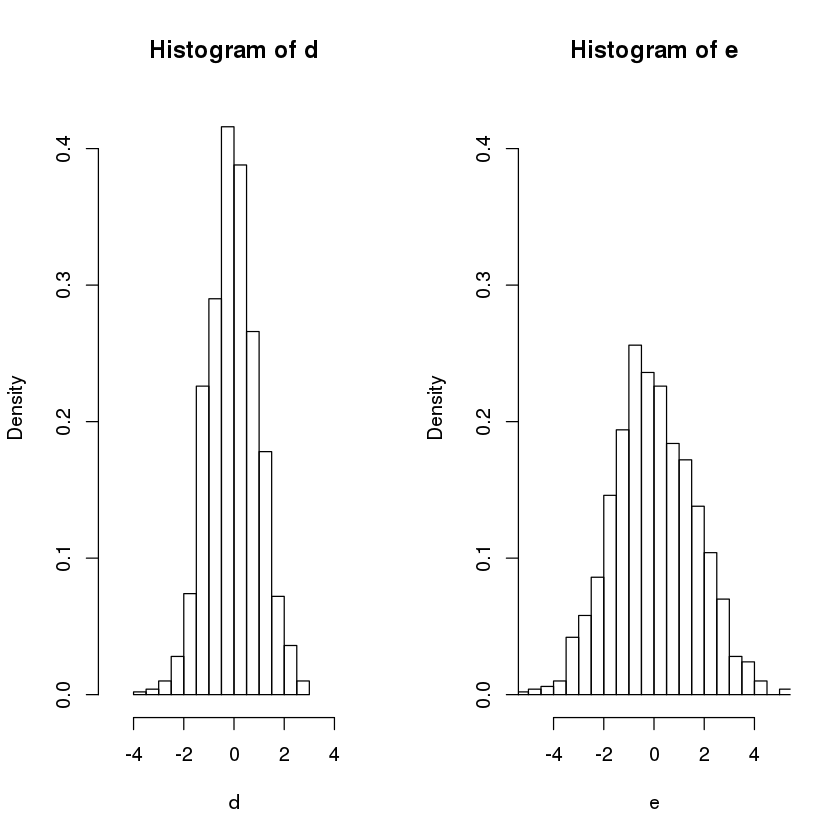

In [12]:
# Exercise 3: Let's control the heritability around 50%
# We can do this by constraining the random variables we created to represent phenotype

# an example where the trait should be only ~50% heritable
set.seed(2345)

# Since siblings share 50% of their genetic material, we need them to share 25%
# of their phenotypic variance for ~50% heritability
# Can use algebra to determine how to mix d,e,f
# 2d + e + f = 1 , e=f
# 2d + 2e = 1
# 2d = 1/4, i.e. 50% shared genetic material corresponds to 25% shared phenotypic variance
# d = 1/8 , e = f = 3/8
# Solving the system of equations, we see that e & f need to contribute
# 3 times as much variation as d
# Since we are sampling based on sd, we set sd=sqrt(3) to get the correct
# proportion of variance
d = rnorm(n=1000,m=0,sd=1)
e = rnorm(n=1000,m=0,sd=1.7) # 1.7 ~ sqrt(3)
f = rnorm(n=1000,m=0,sd=1.7)
var(d)
var(e)
summary(d)
summary(e)
par(mfrow=c(1,2))
hist(d,breaks=20,prob = T, ylim=c(0,0.42), xlim=c(-5,5))
hist(e,breaks=20,prob = T, ylim=c(0,0.42), xlim=c(-5,5))

In [13]:
sib1 = d+e
sib2 = d+f
# this is 1/2 of the "true" heritability
var(d)/var(c(sib1,sib2))


[1] 0.2632416

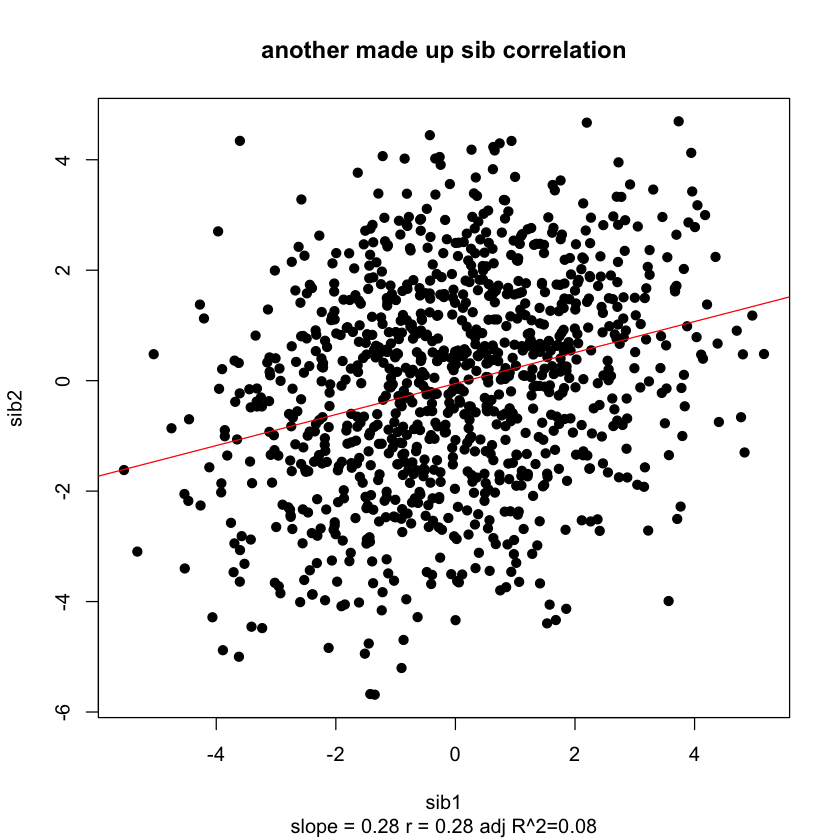

In [21]:
# now try to measure heritability by regression
correl = cor.test(sib1,sib2)
r = round(as.numeric(correl$estimate),2)
m = lm(sib2~sib1)
slope = round(summary(m)$coefficients[2,1],2)
adj.rsq = round(summary(m)$adj.r.squared,2)
plot(sib1,sib2,pch=19,main="another made up sib correlation",sub=paste("slope = ",slope," r = ",r," adj R^2=",adj.rsq,sep=""))
abline(m,col="red")
